___
# Ciência dos Dados - PROJETO 1

## Wesley Gabriel Albano da Silva
### 2ºA

## Pesquisa de público e forma de acesso

___
## Introdução

   Um banco querendo expandir sua plataforma digital. Porém, os custos de desenvolver as duas esferas (uma para mobile e outra pra computador) é muito grande e seus investidores concordaram que se ao menos 80% dos principais possíveis usuários (localizados em São Paulo) que estão no ensino superior utilizarem internet pelo celular eles custearão o desenvolvimento.




___
## Análise e Resultados

#### Os requisitos são claros. Dada uma amostra representativa do estado de São paulo, é preciso extrair a porcentagem de pessoas que estão na grafuação e utilizam o celular para acessar a internet 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\wesle\Desktop\Insper\Ciência dos dados\DataScience


  Os dados utilizados foram extraídos da PNAD de 2015. Foram selecionadas as variáveis úteis na análise: O acesso à internet pelo computador, pelo celular, a idade do entrevistado e o curso que frequenta. 
    Após verificar a existência de algum dado corrompido, o resultado foi salvo em um novo arquivo, contendo apenas os dados úteis para a análise por eficiência na execução dos comandos

In [3]:
dadosSP = pd.read_csv('dados_selecionados_sp.csv')
del dadosSP['Unnamed: 0']

In [5]:
dadosSP.ACESSO_PC = dadosSP.ACESSO_PC.astype('category') #Acesso pelo PC
dadosSP.ACESSO_CELULAR = dadosSP.ACESSO_CELULAR.astype('category') #Acesso pelo celular
dadosSP.TEM_CELULAR = dadosSP.TEM_CELULAR.astype('category') #Possui Celular
dadosSP.CURSO = dadosSP.CURSO.astype('category') #Curso que frequenta

In [6]:
dadosSP.ACESSO_PC.cat.categories = ('nenhum_acesso','sim','nao')
dadosSP.ACESSO_CELULAR.cat.categories  = ('nenhum_acesso','sim','nao')
dadosSP.TEM_CELULAR.cat.categories = ('nenhum_acesso','sim','nao')
dadosSP.CURSO.cat.categories  = ('nenhum_curso','EF','vestibulando','mestrado_doutorado','EM','EJA','supletivo','graduacao','alfabetizacao_adulto','creche','alfabetizacao_crianca','maternal')


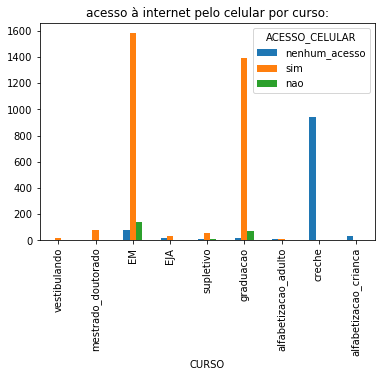

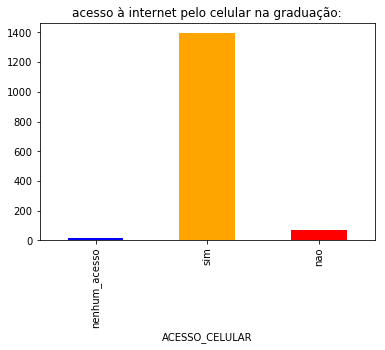

In [8]:
celular_curso = pd.crosstab(dadosSP.CURSO[(dadosSP.CURSO != 'nenhum_curso') & (dadosSP.CURSO != 'EF')],dadosSP.ACESSO_CELULAR)
celular_curso1 = celular_curso.iloc[2:11,:]
plot = celular_curso1.plot(kind = 'bar', title='acesso à internet pelo celular por curso:')
plt.show()


celular_curso = celular_curso.iloc[7,:]
plot = celular_curso.plot(kind = 'bar', title='acesso à internet pelo celular na graduação:', color= ('blue','orange','red'))



Com os gráficos acima, notamos que a quantidade absoluta de acessos à internet por meio do telefone celular é cerca de 1400 pessoas, e as pessoas que não acessam pelo celular são muito inferiores a 200.

    Assim, dividindo o número de pessoas que acessam pelo celular pelo total, chegamos a um total de 93.998%  dos estudantes da graduação acessam a internet pelo celular

# Desenvolvimento das plataformas

 ### Agora, com o financiamento garantido, é preciso planejar qual será o estilo da plataforma
 
 Um dos principais modos de determinar isso, é sabendo qual a faixa etária que predominantemente usará o ambiente virtual:

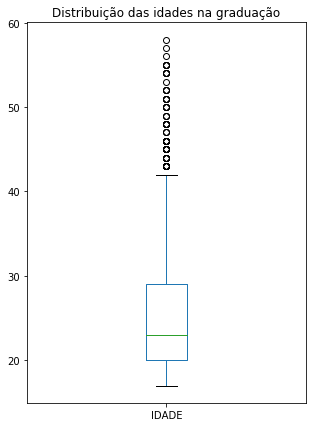

In [9]:
idade_curso = dadosSP.IDADE[(dadosSP.CURSO == 'graduacao')&(dadosSP.IDADE < 60)]
idade_curso.plot(kind='box',title='Distribuição das idades na graduação',figsize=(5,7))

  Analisando o gráfico de estilo caixa, pode-se dizer que pouco mais de 75% dos estudantes da graduação são mais novos que 30 anos; sendo que mais da metade é mais nova que 25 anos. Logo, os aplicativos terão que se seguir um padrão mais moderno e interativo e poderão contar com funcionalidades mais complexas, que demandariam um público mais familiarizado com a tecnologia.

 # Uma visão mais ampla:
 
  Ter a capacidade de desenvolver ambas as plataformas (PC e mobile) é uma vantagem enorme, porém, é preciso saber qual se deve focar mais nos próximos anos após o lançamento da primeira versão:

In [10]:
dados15 = pd.read_csv('dados15.csv')
dados14 = pd.read_csv('dados14.csv')
dados13 = pd.read_csv('dados13.csv')

del dados13['Unnamed: 0']
del dados14['Unnamed: 0']
del dados15['Unnamed: 0']
#dados13.coluna[condition] = 'nome novo'



In [11]:
#dados15 = dados15[(dados15['V02324']==2)|(dados15['V02324']==4)]
dados13.ACESSO_TABL = dados13.ACESSO_TABL.astype('category')
dados13.TEM_3G = dados13.TEM_3G.astype('category')
dados13.ACESSO_CEL = dados13.ACESSO_CEL.astype('category')
dados13.ACESSO_CEL.cat.categories  = ('sim','nao')

dados14.ACESSO_TABL = dados14.ACESSO_TABL.astype('category')
dados14.TEM_3G = dados14.TEM_3G.astype('category')
dados14.ACESSO_CEL = dados14.ACESSO_CEL.astype('category')
dados14.ACESSO_CEL.cat.categories  = ('sim','nao')

dados15.ACESSO_TABL = dados15.ACESSO_TABL.astype('category')
dados15.TEM_3G = dados15.TEM_3G.astype('category')
dados15.ACESSO_CEL = dados15.ACESSO_CEL.astype('category')
dados15.ACESSO_CEL.cat.categories  = ('sim','nao')


In [12]:
#dados15 = dados15[dados15['UF']==35]
acesso_cel2013 =  dados13.ACESSO_CEL.value_counts()
acesso_cel2014 =  dados14.ACESSO_CEL.value_counts()
acesso_cel2015 =  dados15.ACESSO_CEL.value_counts()
acesso_3G13 =  dados13.TEM_3G.value_counts()
acesso_3G14 =  dados14.TEM_3G.value_counts()
acesso_3G15 =  dados15.TEM_3G.value_counts()

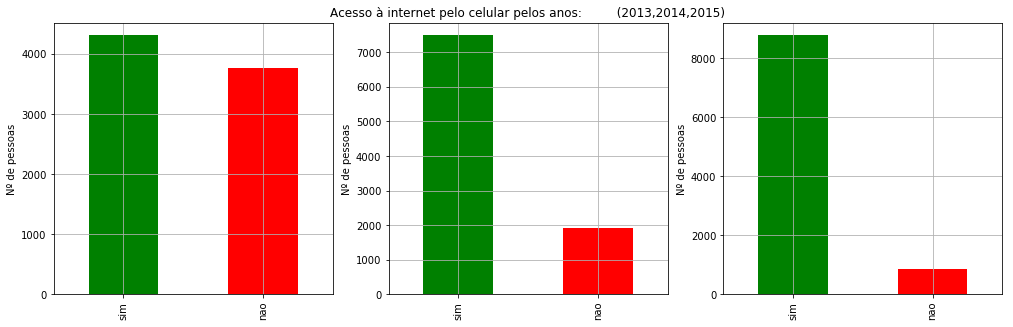

In [13]:
plt.figure(figsize=(17,5))
plt.subplot(131)
acesso_cel2013.plot(kind='bar',color=('green','red'))
plt.ylabel('Nº de pessoas') 
plt.grid(1)
plt.subplot(132)
acesso_cel2014.plot(kind='bar',color=('green','red'),title = 'Acesso à internet pelo celular pelos anos:         (2013,2014,2015)')
plt.ylabel('Nº de pessoas')
plt.grid(1)
plt.subplot(133)
acesso_cel2015.plot(kind='bar',color=('green','red'))
plt.ylabel('Nº de pessoas') 
plt.grid(1)
plt.show()

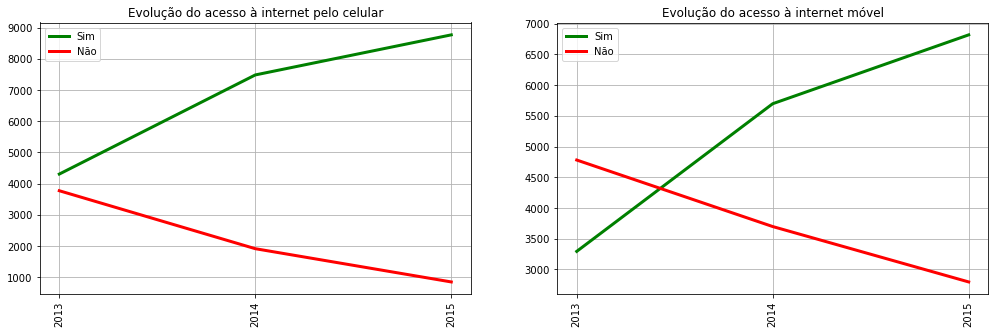

In [14]:
plt.figure(figsize=(17,5))

plt.subplot(121)
plt.plot([2013,2014,2015],[acesso_cel2013[0],acesso_cel2014[0],acesso_cel2015[0]],color='green',linewidth=3,label='Sim')
plt.plot([2013,2014,2015],[acesso_cel2013[1],acesso_cel2014[1],acesso_cel2015[1]],color='red',linewidth=3,label='Não')
plt.xticks([2013,2014,2015],rotation='vertical')
plt.title("Evolução do acesso à internet pelo celular")
plt.legend()
plt.grid(1)

plt.subplot(122)
plt.plot([2013,2014,2015],[acesso_3G13[0],acesso_3G14[0],acesso_3G15[0]],color='green',linewidth=3,label='Sim')
plt.plot([2013,2014,2015],[acesso_3G13[1],acesso_3G14[1],acesso_3G15[1]],color='red',linewidth=3,label='Não')
plt.xticks([2013,2014,2015],rotation='vertical')
plt.title("Evolução do acesso à internet móvel")


plt.legend()
plt.grid(1)
plt.show()


 Está claro que, nos três anos analizados, o acesso à internet pelo celular praticamente dobrou e, mais importante, o acesso à internet móvel também teve um aumento de mais de 100%, mostrando que cada vez mais os clientes usarão os serviços através do telefone celular, tornando o investimento nesse setor ainda mais importante.

___
## Conclusão 

Descreva aqui suas conclusões!

 As PNADS são bancos de dados poderosos para se comparar mudanças a curto prazo dada frequência anual e a variedade de dados coletados. Nesse projeto, foi estudado um caso fictício, porém bastante possível, dando sentido ao estudo dos dados.
 
 Como resultado, obtivemos que praticamente todos os alunos da graduação utilizam do telefone celular para se conectar à internet, vimos também que grande parte deles (50%) são jovens e que alunos com mais de 35 anos são relativamente raros, formando pouco mais de 25% do total. Também pudemos observar que há um enorme aumento na porcentagem de pessoas com acesso à internet móvel (3g).
 
  Ou seja, há uma correlação entre estar num curso de graduação e estar conectado à rede. Como as pessoas nesse nível de curso são novas, elas estão mais próximas à tecnologia moderna (e seus perigos); sendo,facilmente, público alvo de antigas e novas empresas desejando inovar o mercado.